# Iniciativa Popular de Norma   
## En formato  [legible por máquinas](https://es.wikipedia.org/wiki/Datos_legibles_por_m%C3%A1quina)

Este código descarga los datos desde el sitio web para las [Iniciativas Popular de Norma]( https://plataforma.chileconvencion.cl/m/iniciativa_popular/) guardándolo en un formato estructurado, para así facilitar su análisis.


Diego Sáez Trumper, 1 de Febrero, 2022

In [63]:
#Utilizamos las siguentes librerias
import requests
from bs4 import BeautifulSoup

In [64]:
# añadimos la url a ser analizada
url ='https://plataforma.chileconvencion.cl/m/iniciativa_popular/'
pagina = requests.get(url)
# y la leemos con BS4
soup = BeautifulSoup(pagina.text, 'html.parser')

In [125]:
titulos  = []
apoyos = []
fecha = []
descripcion = []
autores = []
urls = []
categoria = []
categoria_full = []
for iniciativa in soup.find_all('div',
                                {"class" : lambda L: L and L.startswith('card iniciativa')}):
    titulos.append(iniciativa.find('h1').text)
    apoyos.append(int(iniciativa.attrs['data-apoyos']))
    fecha.append(iniciativa.attrs['data-fecha'])
    descripcion.append(iniciativa.find('p').text)
    autores.append(iniciativa.find(class_='autor').text)
    urls.append(url+iniciativa.find('h1').find('a')['href'])
    categoria.append(iniciativa.attrs['class'][2])
    categoria_full.append(iniciativa.find('div',{"class" : lambda L: L and L.startswith('pill')}).text)
        


In [142]:
#utilizamos la librería pandas para guardar los datos
import pandas as pd

datos = pd.DataFrame({'Título':titulos,'Apoyos':apoyos,'Fecha':fecha,'Categoría':categoria,
                      'Categoría Completa':categoria_full,
             'Autores':autores,'URL':url,'Descripción':descripcion})

In [143]:
datos.to_excel('iniciativas_resultado_final.xls')

<ipython-input-143-78673ba26961>:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  datos.to_excel('iniciativas_resultado_final.xls')


In [145]:
datos.to_csv('iniciativas_resultado_final.csv')

## Resumen de los datos

In [130]:
#Total de propuestas
print(datos.shape[0])

2496


In [131]:
#las 20 propuestas más votadas
#Total de propuestas
datos.sort_values('Apoyos',ascending=False)[0:10]

,Título,Apoyos,Fecha,Categoría,Categoria Completa,Autores,URL,Descripción
2362,CON MI PLATA NO - DEFIENDE TUS AHORROS PREVISI...,56899,2021-12-15 16:13:42,derechos,4 - Derechos Fundamentales,Por Con Mi Plata NO,https://plataforma.chileconvencion.cl/m/inicia...,Una de las grandes demandas sociales que se ma...
2459,Libre derecho sobre la propiedad privada,44932,2021-12-09 11:04:57,derechos,4 - Derechos Fundamentales,Por María Chacón W.,https://plataforma.chileconvencion.cl/m/inicia...,Derecho a la propiedad privada. A que cada per...
1333,Cannabis a la Constitución Ahora: Por el derec...,42346,2022-01-12 12:33:58,derechos,4 - Derechos Fundamentales,Por Activismo Cannábico Chile,https://plataforma.chileconvencion.cl/m/inicia...,El Estado de Chile incumple su deber esencial ...
2253,Será Ley,35208,2021-12-24 13:19:28,derechos,4 - Derechos Fundamentales,Por Asamblea Permanente por la Legalización de...,https://plataforma.chileconvencion.cl/m/inicia...,Como Asamblea Permanente por la Legalización d...
1789,Banco Central Autónomo,34125,2022-01-07 17:08:05,justicia,"6 - Sistema de Justicia, Órganos Autónomos de ...",Por Banco Central Autónomo,https://plataforma.chileconvencion.cl/m/inicia...,La inflación es uno de los temas económicos má...
2489,Derecho a la vida,29429,2021-12-09 10:54:00,derechos,4 - Derechos Fundamentales,Por Siempre por la Vida,https://plataforma.chileconvencion.cl/m/inicia...,Queremos que el derecho a la vida tenga protec...
2436,Confesiones religiosas quieren contribuir con ...,27617,2021-12-09 11:13:27,derechos,4 - Derechos Fundamentales,Por Confesiones religiosas en Chile,https://plataforma.chileconvencion.cl/m/inicia...,La presentación la hacen la mayoría de las Con...
2449,"Derecho a la Educación, Derecho y Deber Prefer...",27196,2021-12-09 11:09:23,derechos,4 - Derechos Fundamentales,Por Acción Educar,https://plataforma.chileconvencion.cl/m/inicia...,La iniciativa tiene como objetivo asegurar el ...
2422,Iniciativa Popular por una Educación Libre y D...,26080,2021-12-09 11:19:53,derechos,4 - Derechos Fundamentales,Por Educación Libre y Diversa,https://plataforma.chileconvencion.cl/m/inicia...,La necesidad de mejorar la calidad y el acceso...
1568,"Por el Agua, los Derechos de la Naturaleza y l...",25667,2022-01-10 16:06:10,medio_ambiente,"5 - Medio Ambiente, Derechos de la Naturaleza,...","Por Articulación por las Aguas, los Derechos d...",https://plataforma.chileconvencion.cl/m/inicia...,Es urgente desprivatizar las aguas y recuperar...


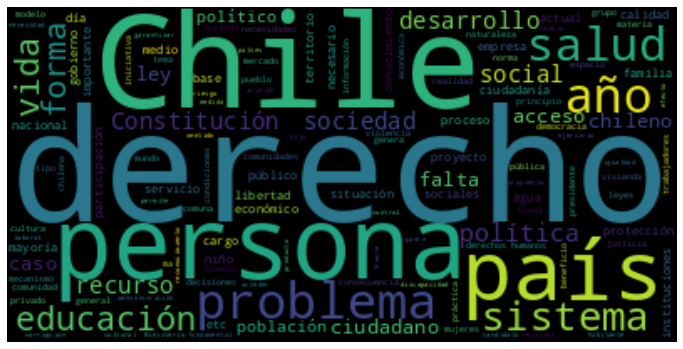

In [132]:
## Visualizar como WordCloud

#Cargamos nuestra librería de visualización

from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

#ponemos todo el texto en un string
text = ' '.join(datos['Descripción'].tolist())

#  Creamos el wordcloud
wordcloud = WordCloud().generate(text)

#quitar "stopwords" 
stopwords = pd.read_html('https://countwordsfree.com/stopwords/spanish')[0][1].tolist()

# Create and generate a word cloud image:
plt.figure(figsize = (12,8))
wordcloud = WordCloud(stopwords=stopwords).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



In [112]:
## Analisis por categoria
datos.groupby('Categoría').agg({'Título':'count','Apoyos':'median'})

,Título,Apoyos
Categoría,,
conocimiento,138,140.0
derechos,998,208.0
estado,272,73.0
gobierno,452,71.5
justicia,146,98.5
medio_ambiente,299,219.0
principios,191,58.0


1 - Sobre Sistema Político, Gobierno, Poder Legislativo y Sistema Electoral


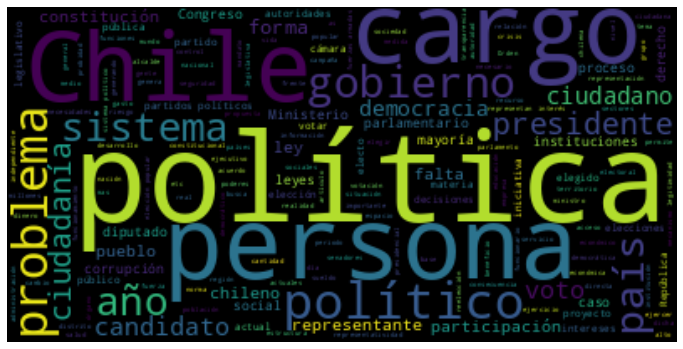

2 - Sobre Principios Constitucionales, Democracia, Nacionalidad y Ciudadanía


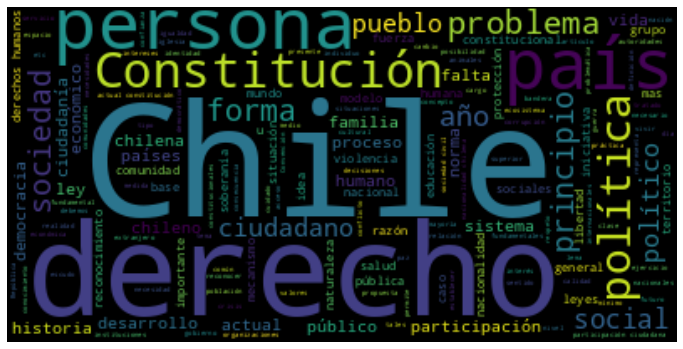

3 - Forma de Estado, Ordenamiento, Autonomía, Descentralización, Equidad, Justicia Territorial, Gobiernos Locales y Organización Fiscal


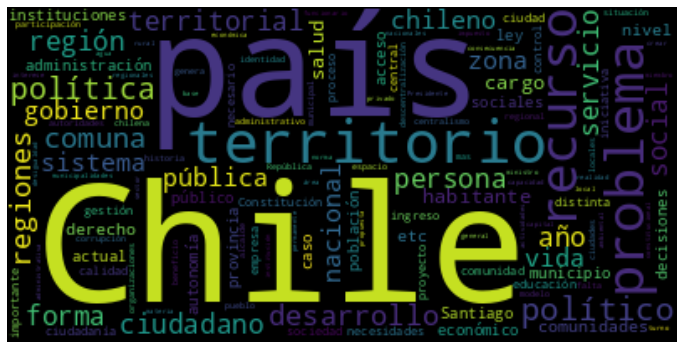

4 - Derechos Fundamentales


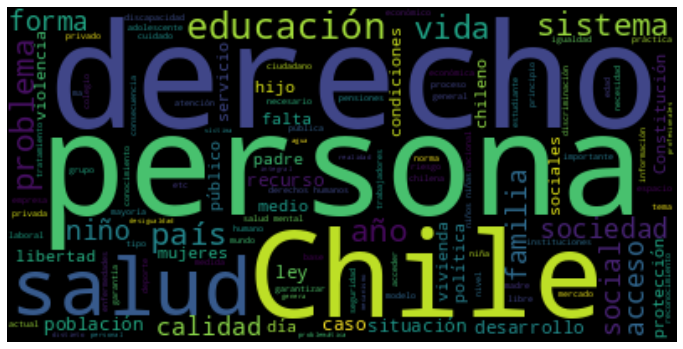

5 - Medio Ambiente, Derechos de la Naturaleza, Bienes Naturales Comunes y Modelo Económico


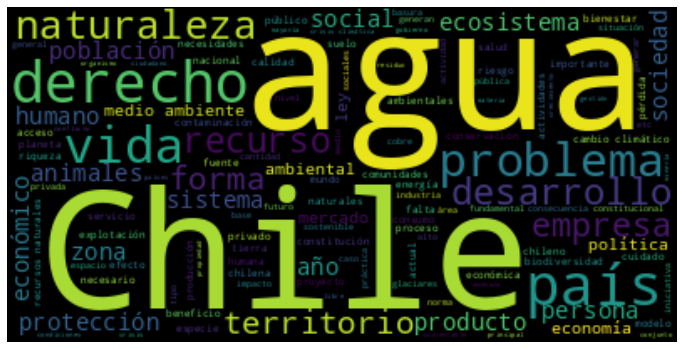

6 - Sistema de Justicia, Órganos Autónomos de Control y Reforma Constitucional


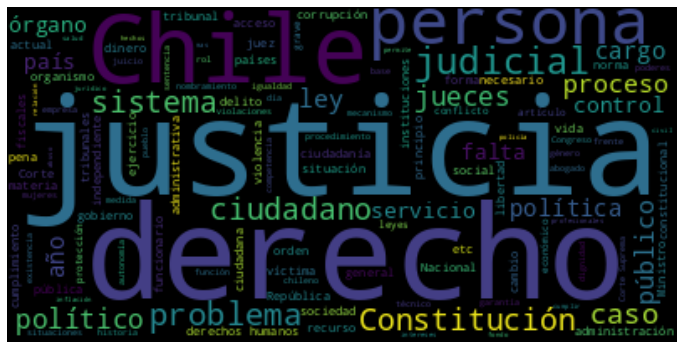

7 - Sistemas de Conocimientos, Culturas, Ciencia, Tecnología, Artes y Patrimonios


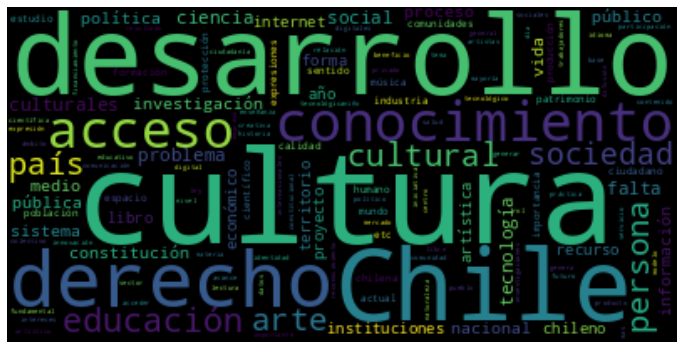

In [147]:
## Word Cloud por categoría
for nombre,cat in datos.groupby('Categoría Completa'):
    print(nombre)
    text = ' '.join(cat['Descripción'].tolist())

    #  Creamos el wordcloud
    wordcloud = WordCloud().generate(text)

    #quitar "stopwords" 
    stopwords = pd.read_html('https://countwordsfree.com/stopwords/spanish')[0][1].tolist()

    # Create and generate a word cloud image:
    plt.figure(figsize = (12,8))
    wordcloud = WordCloud(stopwords=stopwords).generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig(cat['Categoría'].iloc[0]+'.jpg', bbox_inches='tight')
    plt.show()
